In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf

In [86]:
df = pd.read_csv(r"C:\Users\ANSHUMAN\OneDrive\Desktop\MLModels\KaggleBankChurnPredicion\train.csv")
df.shape

(15000, 14)

In [87]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15635502.0,Pirozzi,632.0,France,Female,63.0,5.0,0.00,2.0,0.0,1.0,140780.80,0.0
1,1,15595440.0,Horsley,730.0,Germany,Female,35.0,5.0,182532.23,2.0,1.0,1.0,136491.32,0.0
2,2,15803566.0,Zito,598.0,Spain,Male,45.0,2.0,94049.92,1.0,1.0,1.0,131718.12,0.0
3,3,15693906.0,Iloerika,678.0,France,Female,38.0,9.0,0.00,2.0,1.0,1.0,164768.82,0.0
4,4,15679531.0,K'ung,710.0,France,Female,32.0,4.0,0.00,2.0,0.0,0.0,100187.43,0.0


Now, we can see the parameters on which the Exited option depends.
## Now, let's remove the NaN valued rows..

In [88]:
df.isnull().sum()
## This function checks the columns of missing values. If any of the columns contain the missing values, it 
## considers it to be 1, else 0.
## The sum() then adds the 1 values and thus we would get the number of columns with missing values.

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [89]:
df.nunique()
## This would return the unique count of each variables

id                 15000
CustomerId          6293
Surname              764
CreditScore          379
Geography              3
Gender                 2
Age                   54
Tenure                12
Balance             3354
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     6135
Exited                 2
dtype: int64

In [90]:
## We don't require some of the attributes above. For example, row number, customer id, surname.
df = df.drop(["id", "CustomerId", "Surname"], axis = 1)

In [91]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,632.0,France,Female,63.0,5.0,0.00,2.0,0.0,1.0,140780.80,0.0
1,730.0,Germany,Female,35.0,5.0,182532.23,2.0,1.0,1.0,136491.32,0.0
2,598.0,Spain,Male,45.0,2.0,94049.92,1.0,1.0,1.0,131718.12,0.0
3,678.0,France,Female,38.0,9.0,0.00,2.0,1.0,1.0,164768.82,0.0
4,710.0,France,Female,32.0,4.0,0.00,2.0,0.0,0.0,100187.43,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14995,602.0,France,Female,31.0,2.0,0.00,2.0,1.0,0.0,122433.09,0.0
14996,731.0,France,Female,44.0,4.0,0.00,2.0,1.0,0.0,112973.22,0.0
14997,705.0,France,Female,39.0,2.0,129118.50,1.0,1.0,1.0,87985.20,0.0
14998,648.0,Germany,Female,45.0,1.0,107868.14,1.0,1.0,0.0,141148.21,1.0


In [92]:
## Now, for checking the type of data, or categorical or continuous variables, we will check the type of the data.
df.dtypes

CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited             float64
dtype: object

So, we have no missing values. Great!!

Now, we need to visualize the data and dependencies of different variables with the outcome.

In [93]:
df = df.drop(df.columns[[1, 2, 3, 4]],axis=1)
df

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,632.0,0.00,2.0,0.0,1.0,140780.80,0.0
1,730.0,182532.23,2.0,1.0,1.0,136491.32,0.0
2,598.0,94049.92,1.0,1.0,1.0,131718.12,0.0
3,678.0,0.00,2.0,1.0,1.0,164768.82,0.0
4,710.0,0.00,2.0,0.0,0.0,100187.43,0.0
...,...,...,...,...,...,...,...
14995,602.0,0.00,2.0,1.0,0.0,122433.09,0.0
14996,731.0,0.00,2.0,1.0,0.0,112973.22,0.0
14997,705.0,129118.50,1.0,1.0,1.0,87985.20,0.0
14998,648.0,107868.14,1.0,1.0,0.0,141148.21,1.0


Now, we are left with 7 most important features to decide the presence of the customer.

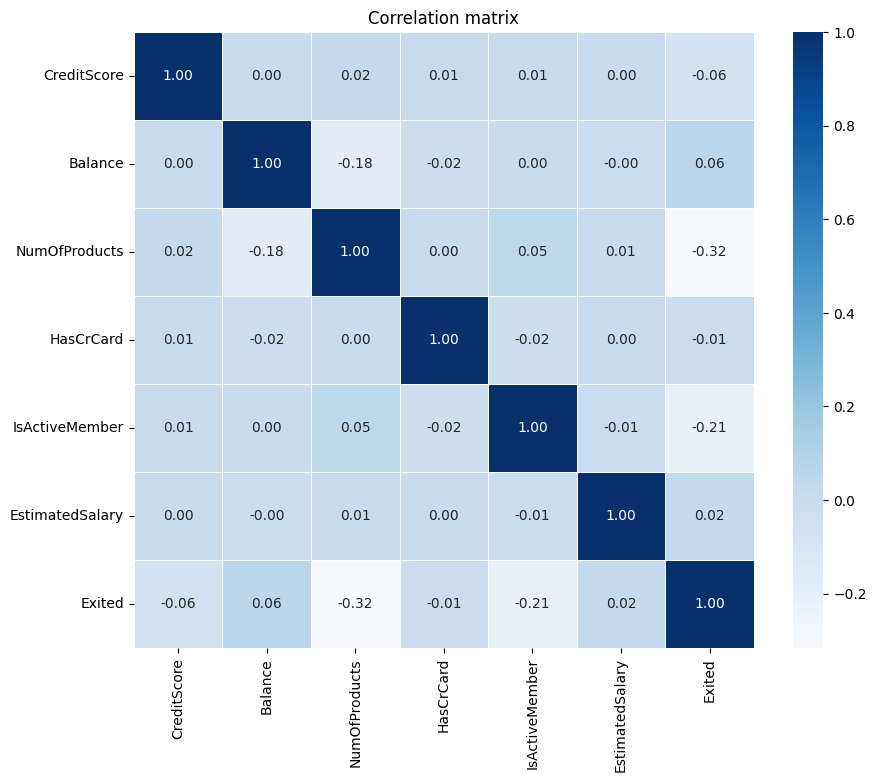

In [94]:
## Let's try a correlation matrix to get the relationship between different parameters in determining the outcome.
import seaborn as sns
corr_matrix = df.corr()

## Now, we can create a heatmap using seaborn library imported.

plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'Blues', fmt = '.2f', linewidths = .5)
plt.title('Correlation matrix')
plt.savefig('Correlation Matrix for Costumers')
plt.show()

Clearly from the above correlation matrix, NumOfProducts and IsActiveMember have the more correlation coefficient 
in magnitude. But, they are in negative sense. 

In [95]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [96]:
dfArr = df.to_numpy()

In [97]:
print(dfArr.shape)

(15000, 7)


2380 9397 683 2540


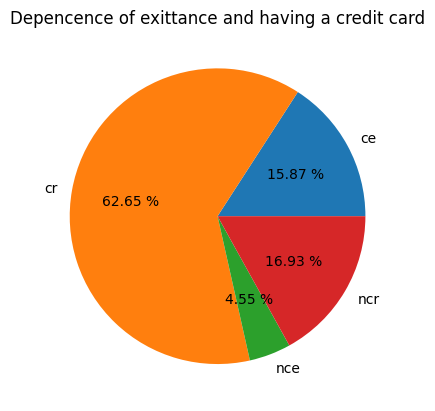

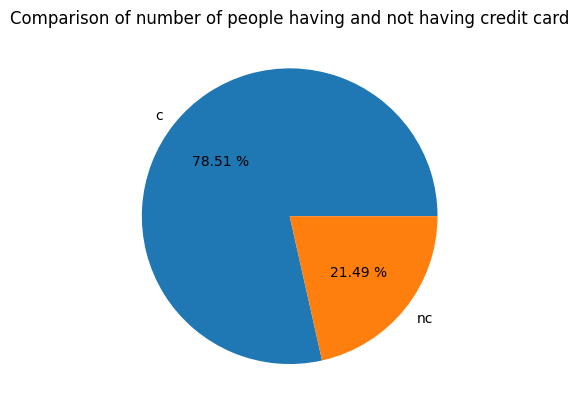

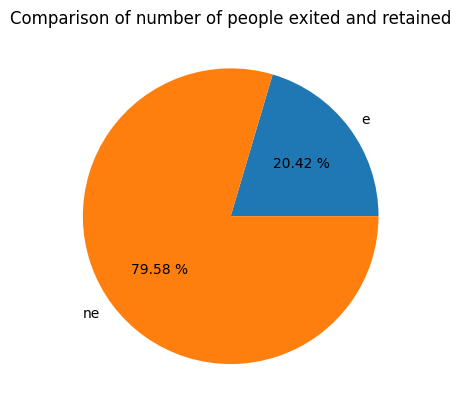

In [98]:
ce = 0
cr = 0
nce = 0
ncr = 0
c = 0
nc = 0
e = 0
ne = 0
for i in range(15000):
    if dfArr[i][3] == 1 and dfArr[i][6] == 1:
        ce += 1
        c += 1
        e += 1
    elif dfArr[i][3] == 1 and dfArr[i][6] == 0:
        cr += 1
        c += 1
        ne += 1
    elif dfArr[i][3] == 0 and dfArr[i][6] == 1:
        nce += 1
        nc += 1
        e += 1
    elif dfArr[i][3] == 0 and dfArr[i][6] == 0:
        ncr += 1
        nc += 1
        ne += 1
        
print(ce, cr, nce, ncr)

plt.pie([ce, cr, nce, ncr], labels = ['ce', 'cr', 'nce', 'ncr'], autopct = '%.2f %%')
plt.title('Depencence of exittance and having a credit card')
plt.show()

plt.pie([c, nc], labels = ['c', 'nc'], autopct = '%.2f %%')
plt.title('Comparison of number of people having and not having credit card')
plt.show()

plt.pie([e, ne], labels = ['e', 'ne'], autopct = '%.2f %%')
plt.title('Comparison of number of people exited and retained')
plt.show()

# ## Now, I think we should check the dependency of exittance with the credit score.
# exitCount = [0, 0, 0, 0]
# for i in range(15000):
#     if dfArr[i][1] >= 600 and dfArr <= 649:
#         if dfArr[i][6] == 1:
#             exitCount[0] += 1
#     elif dfArr[i][1] >= 650 and dfArr <= 699:
#         if dfArr[i][6] == 1:
#             exitCount[1] += 1
#     elif dfArr[i][1] >= 700 and dfArr <= 749:
#         if dfArr[i][6] == 1:
#             exitCount[2] += 1
#     elif dfArr[i][1] >= 750 and dfArr <= 900:
#         if dfArr[i][6] == 1:
#             exitCount[3] += 1
            
# plt.pie(exitCount, labels = ['poor', 'fair', 'good', 'ex'], autopct = '%.2f %%')
# plt.title('Depencence of exittance and credit score')
# plt.show()

Clearly, the ratio of exited customers from both the categories of having credit card and not having credit card are nearly equal.
As per the correlation matrix also, the correlation of the two features HaveCrCard and Exited is very less(= 0.06). Similarly, all the features except NumProducts and IsActiveMember have very low correlation values. 

In [99]:
## Let's try applying neural network in the model.
## Let's split the dataframe array into X and y. X would contain the parameters other than 'Exiteed', and y
## would contain the values of the parameter 'Exited'.


In [100]:
X = dfArr[:, :6].copy()
y = dfArr[:, 6].copy()

## Now, we should normalize the values in the X and the y.
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
Xn

<tf.Tensor: shape=(15000, 6), dtype=float32, numpy=
array([[-0.36411068, -0.31541455,  0.7894081 , -1.9115567 ,  1.0116681 ,
         0.3352833 ],
       [ 0.96585226,  0.99456143,  0.7894081 ,  0.52313375,  1.0116681 ,
         0.27193832],
       [-0.8255264 ,  0.35955194, -1.1018428 ,  0.52313375,  1.0116681 ,
         0.20145029],
       ...,
       [ 0.626576  ,  0.611228  , -1.1018428 ,  0.52313375,  1.0116681 ,
        -0.44437566],
       [-0.14697388,  0.4587209 , -1.1018428 ,  0.52313375, -0.9884665 ,
         0.34070897],
       [ 0.8437128 , -0.31541455,  0.7894081 ,  0.52313375, -0.9884665 ,
        -1.3673826 ]], dtype=float32)>

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
tf.random.set_seed(1234)  # applied to achieve consistent results => We get the same set of random numbers on running multip
model = Sequential(
    [
        tf.keras.Input(shape=(6,)),
        Dense(3, activation='sigmoid', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
     ]
)

In [102]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

In [103]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(6, 3):
 [[-0.81525636 -0.7247412  -0.70120156]
 [ 0.7133095  -0.7493628   0.5457665 ]
 [-0.08937615  0.37615943  0.14514464]
 [ 0.04110509  0.42324305 -0.01327401]
 [-0.570213    0.23456633 -0.23055464]
 [-0.54607147 -0.5247351   0.01794934]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[ 0.40641475]
 [-0.85858965]
 [-0.156829  ]] 
b2(1,): [0.]


In [104]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xn,y,            
    epochs=10,
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4591
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3992
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3935
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3901
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3844
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3758
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3688
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3637
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3609
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3595


Now, we have generated our parameters which would generate the minimum value of cost function, and also fit the 
model with the train data. Now, we need to implement the model with the test data set.

In [105]:
df_test = pd.read_csv('test.csv')

In [106]:
df_test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15737792.0,Chiazagomekpere,727.0,France,Female,32.0,6.0,0.00,2.0,1.0,1.0,180969.55
1,15001,15808846.0,Ts'ai,690.0,France,Male,38.0,4.0,0.00,1.0,1.0,0.0,56780.97
2,15002,15652693.0,Manna,535.0,France,Female,31.0,7.0,118235.70,1.0,0.0,1.0,28407.40
3,15003,15602572.0,Chukwukadibia,638.0,Spain,Male,51.0,8.0,0.00,1.0,0.0,0.0,118570.53
4,15004,15684269.0,T'ien,584.0,Spain,Male,29.0,9.0,0.00,2.0,1.0,0.0,35795.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,15806922.0,Lo Duca,652.0,France,Female,50.0,8.0,0.00,1.0,0.0,0.0,120853.83
9996,24996,15598070.0,Mazzanti,686.0,Spain,Male,42.0,7.0,0.00,2.0,1.0,0.0,170980.54
9997,24997,15646539.0,Chibugo,588.0,Germany,Female,40.0,2.0,105603.21,2.0,1.0,0.0,71862.79
9998,24998,15736124.0,Onyekachi,685.0,Germany,Male,42.0,2.0,137714.40,1.0,0.0,0.0,82867.94


In [107]:
df_test2 = df_test.drop(df_test.columns[[0, 1, 2, 4, 5, 6, 7]],axis=1)
df_test2

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,727.0,0.00,2.0,1.0,1.0,180969.55
1,690.0,0.00,1.0,1.0,0.0,56780.97
2,535.0,118235.70,1.0,0.0,1.0,28407.40
3,638.0,0.00,1.0,0.0,0.0,118570.53
4,584.0,0.00,2.0,1.0,0.0,35795.85
...,...,...,...,...,...,...
9995,652.0,0.00,1.0,0.0,0.0,120853.83
9996,686.0,0.00,2.0,1.0,0.0,170980.54
9997,588.0,105603.21,2.0,1.0,0.0,71862.79
9998,685.0,137714.40,1.0,0.0,0.0,82867.94


In [108]:
dfArr_t = df_test2.to_numpy()
dfArr_t

array([[7.2700000e+02, 0.0000000e+00, 2.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.8096955e+05],
       [6.9000000e+02, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 5.6780970e+04],
       [5.3500000e+02, 1.1823570e+05, 1.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 2.8407400e+04],
       ...,
       [5.8800000e+02, 1.0560321e+05, 2.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 7.1862790e+04],
       [6.8500000e+02, 1.3771440e+05, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 8.2867940e+04],
       [6.9500000e+02, 1.3805379e+05, 2.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.7266839e+05]])

In [109]:
Xt = dfArr_t.copy()

norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(Xt)  # learns mean, variance
Xn_t = norm_l(Xt)
Xn_t

<tf.Tensor: shape=(10000, 6), dtype=float32, numpy=
array([[ 0.9301233 , -0.6977429 ,  0.7777579 ,  0.5340242 ,  1.0098485 ,
         1.388859  ],
       [ 0.42837277, -0.6977429 , -1.1113795 ,  0.5340242 , -0.99024755,
        -1.3386432 ],
       [-1.6735553 ,  1.2921864 , -1.1113795 , -1.8725743 ,  1.0098485 ,
        -1.9618002 ],
       ...,
       [-0.9548315 ,  1.0795791 ,  0.7777579 ,  0.5340242 , -0.99024755,
        -1.0074074 ],
       [ 0.36056864,  1.6200167 , -1.1113795 , -1.8725743 , -0.99024755,
        -0.76570594],
       [ 0.4961769 ,  1.6257287 ,  0.7777579 , -1.8725743 , -0.99024755,
         1.2065442 ]], dtype=float32)>

In [110]:
y_pred = model.predict(Xn_t)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [128]:
print(y_pred)
print(y_pred.shape)
print(type(y_pred))
y_pred.shape

[[0.01760913]
 [0.57953566]
 [0.19575743]
 ...
 [0.3197186 ]
 [0.2497135 ]
 [0.58312637]]
(10000, 1)
<class 'numpy.ndarray'>


(10000, 1)

In [129]:
# yhat = []          # Returns an array of zeroes of the same size as predictions array.
# for i in range(len(y_pred)):
#     if y_pred[i] >= 0.5:
#         yhat.append(1.0)
#     else:                                  # This else is not required ig!!
#         yhat.append(0.0)
# print(f"decisions = \n{yhat}")

In [134]:
id = df_test['id'].copy()
# yPred = y_pred.copy()
# yPred = pd.Series(yPred)
# print(yPred)

yPred = []

l = len(y_pred)

for i in range(l):
    yPred.append(y_pred[i])

print(yPred)
type(yPred)

[array([0.01760913], dtype=float32), array([0.57953566], dtype=float32), array([0.19575743], dtype=float32), array([0.6180547], dtype=float32), array([0.02785151], dtype=float32), array([0.6067401], dtype=float32), array([0.62063164], dtype=float32), array([0.01763187], dtype=float32), array([0.48684177], dtype=float32), array([0.61367345], dtype=float32), array([0.16730782], dtype=float32), array([0.01878836], dtype=float32), array([0.3604602], dtype=float32), array([0.01856807], dtype=float32), array([0.02027751], dtype=float32), array([0.02762677], dtype=float32), array([0.5921699], dtype=float32), array([0.49598423], dtype=float32), array([0.05045154], dtype=float32), array([0.03358125], dtype=float32), array([0.30005348], dtype=float32), array([0.41839767], dtype=float32), array([0.1429613], dtype=float32), array([0.30473077], dtype=float32), array([0.0182442], dtype=float32), array([0.01712832], dtype=float32), array([0.14805432], dtype=float32), array([0.02179637], dtype=float32

list

In [145]:
# # yhat.loc[:, ['Id', yhat]].to_csv('prediction.csv', index = False)
# pred = pd.DataFrame(yhat)
# pred
pred = pd.Series(yPred)
pred

0        [0.01760913]
1        [0.57953566]
2        [0.19575743]
3         [0.6180547]
4       [0.027851509]
            ...      
9995     [0.61684823]
9996    [0.027204467]
9997      [0.3197186]
9998      [0.2497135]
9999     [0.58312637]
Length: 10000, dtype: object

In [146]:
data = pd.DataFrame({'id': id, 'Exited': pred})
data

,id,Exited
0,15000,[0.01760913]
1,15001,[0.57953566]
2,15002,[0.19575743]
3,15003,[0.6180547]
4,15004,[0.027851509]
...,...,...
9995,24995,[0.61684823]
9996,24996,[0.027204467]
9997,24997,[0.3197186]
9998,24998,[0.2497135]


In [147]:
# np.savetxt('Predictions.csv', yhat, delimiter=',')
pred.to_csv('FinalSubmission.csv', index = False)

In [148]:
data.to_csv('AnotherTry.csv', index = False)